In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [3]:
x,y = make_moons(n_samples = 200, noise = 0.2,random_state = 42)

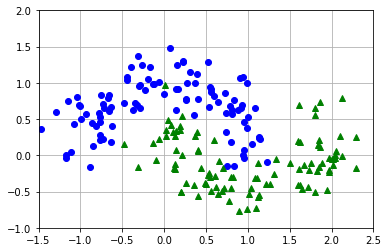

In [4]:
plt.plot(x[:,0][y==0], x[:,1][y==0], 'bo')
plt.plot(x[:,0][y==1], x[:,1][y==1], 'g^')
plt.grid()
plt.axis([-1.5,2.5,-1,2.0])
plt.show()

In [5]:
def plot_dataset(x,y,axes):
    plt.plot(x[:,0][y==0], x[:,1][y==0], 'bo')
    plt.plot(x[:,0][y==1], x[:,1][y==1], 'g^')
    plt.xlabel('X')
    plt.ylabel('y', rotation = 0)
    plt.grid()
    plt.axis(axes)

In [6]:
x_,y_ = make_moons(n_samples = 2, random_state=42, noise = 0.15)
np.set_printoptions(precision = 2)

In [7]:
x_

array([[-0.08,  0.58],
       [ 1.07,  0.21]])

In [8]:
y_

array([1, 0], dtype=int64)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)

In [10]:
x_1 = poly.fit_transform(x_)
x_1

array([[ 1.00e+00, -8.25e-02,  5.77e-01,  6.81e-03, -4.76e-02,  3.33e-01,
        -5.62e-04,  3.93e-03, -2.75e-02,  1.92e-01],
       [ 1.00e+00,  1.07e+00,  2.05e-01,  1.15e+00,  2.20e-01,  4.21e-02,
         1.23e+00,  2.35e-01,  4.51e-02,  8.65e-03]])

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
scaler = StandardScaler()
svc_clf = LinearSVC(C = 10, loss='hinge')

In [12]:
poly_svc_clf = Pipeline([('poly', poly),
                         ('scaler', scaler),
                         ('svc_clf',svc_clf)])

In [13]:
poly_svc_clf.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svc_clf', LinearSVC(C=10, loss='hinge'))])

In [14]:
# nx,ny = (10,10)
# x = np.linspace(0,1,nx)
# y = np.linspace(0,1,ny)
# x

In [15]:
# y

In [16]:
# xv,yv = np.meshgrid(x,y)
# xv

In [17]:
# yv

In [18]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

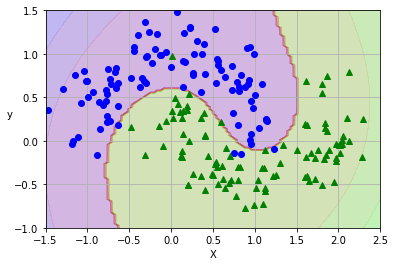

In [19]:
plot_predictions(poly_svc_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [20]:
r = np.arange(-1,1,0.5).reshape(-1,2)
r

array([[-1. , -0.5],
       [ 0. ,  0.5]])

In [21]:
r.ravel()

array([-1. , -0.5,  0. ,  0.5])

In [22]:
axes = [-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_svc_clf.predict(X).reshape(x0.shape)

In [23]:
X

array([[-1.5 , -1.  ],
       [-1.46, -1.  ],
       [-1.42, -1.  ],
       ...,
       [ 2.42,  1.5 ],
       [ 2.46,  1.5 ],
       [ 2.5 ,  1.5 ]])

In [24]:
y_decision = poly_svc_clf.decision_function(X).reshape(x0.shape)
y_decision.shape

(100, 100)

In [25]:
from sklearn.svm import SVC

In [26]:
svc_clf_ = Pipeline([('scaler', StandardScaler()),
                     ('svc_classifier', SVC(kernel = 'poly', C = 5, coef0 = 1, degree= 3))
                     ])

In [27]:
svc_clf_.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc_classifier', SVC(C=5, coef0=1, kernel='poly'))])

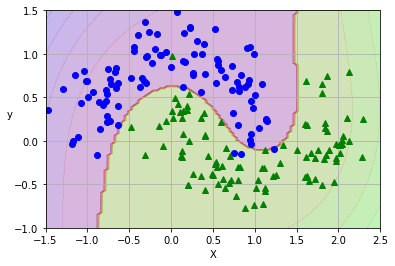

In [28]:
plot_predictions(svc_clf_, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [29]:
svc_clf_10 = Pipeline([('scaler', StandardScaler()),
                     ('svc_classifier', SVC(kernel = 'poly', C = 5, coef0 = 100, degree= 10))
                     ])

In [71]:
svc_clf_10.fit(x,y)

In [1]:
plot_predictions(svc_clf_10, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

NameError: name 'plot_predictions' is not defined

In [ ]:
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)
plot_predictions(svc_clf_, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title('C = 5, degree = 3, r= 1')

plt.subplot(1,2,2)
plot_predictions(svc_clf_10, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title('C = 5, degree = 10, r = 100')

plt.show()